In [1]:
from __future__ import print_function
import os
import argparse
import pickle
import torch
from torchvision import datasets, transforms

from model import SoftDecisionTree

from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("tensorflow version: ", tf.__version__)
print("keras version: ", keras.__version__)
import sklearn

print("sklearn version: ", sklearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import (
    make_moons,
    make_circles,
    make_classification,
    make_blobs,
    load_iris,
    load_wine,
    load_breast_cancer,
    load_digits,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_array, check_random_state
from sklearn.utils import shuffle as util_shuffle
import numpy as np

print("numpy version: ", np.__version__)
import matplotlib

print("matplotlib version: ", matplotlib.__version__)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cv2

print("cv2 version: ", cv2.__version__)
import math
from statistics import mean, stdev
import os
import sys
import pandas as pd

print("pandas version: ", pd.__version__)
import time
from tqdm import tqdm

from scipy import spatial

from collections import Counter

from joblib import Parallel, delayed
import multiprocessing

import math
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
import random

2023-07-03 14:02:32.225648: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 14:02:33.251087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


tensorflow version:  2.12.0
keras version:  2.12.0
sklearn version:  1.2.2
numpy version:  1.23.3
matplotlib version:  3.7.1
cv2 version:  4.7.0
pandas version:  2.0.0


In [2]:

def make_fourmoons(n_samples=250, shuffle=True, noise=None, random_state=None):
    # Make four interleaving half elongated circles.
    # This function is adapted from sklearn.datasets.make_moons
    # Parameters
    # ----------
    # n_samples : int, optional (default=250)
    #     The number of points generated for each moon.
    # shuffle : bool, optional (default=True)
    #     Whether to shuffle the samples.
    # noise : double or None (default=None)
    #     Standard deviation of Gaussian noise added to the data.
    # random_state : int, RandomState instance, default=None
    #     Determines random number generation for dataset shuffling and noise.
    #     Pass an int for reproducible output across multiple function calls.
    # Returns
    # -------
    # X_4moon : array of shape [4*n_samples, 2]
    #     The generated samples.
    # y_4moon : array of shape [4*n_samples]
    #     The integer labels (0, 1, 2, 4) for class membership of each sample.

    generator = check_random_state(random_state)

    displacement = 2 - 0.67
    circ_x = []
    circ_y = []
    for moon_i in range(4):
        circ_x.append(
            np.cos(np.linspace(0, np.pi, n_samples)) + moon_i * displacement
        )  # shape (n_sample,)
        circ_y.append(
            pow(-1, moon_i) * (-2 * np.sin(np.linspace(0, np.pi, n_samples)) + 0.5)
        )

    X_4moon = np.vstack(
        [np.hstack(circ_x), np.hstack(circ_y)]
    ).T  # shape (4*n_sample, 2)
    y_4moon = np.hstack(
        [moon_i * np.ones(n_samples, dtype=np.intp) for moon_i in range(4)]
    )  # shape (4*n_sample)

    if shuffle:
        X_4moon, y_4moon = util_shuffle(X_4moon, y_4moon, random_state=generator)

    if noise is not None:
        X_4moon += generator.normal(
            scale=noise, size=X_4moon.shape
        )  # add zero-mean normal distributed noise

    return X_4moon, y_4moon

4
train
(1200, 2)
(1200,)
test
(800, 2)
(800,)


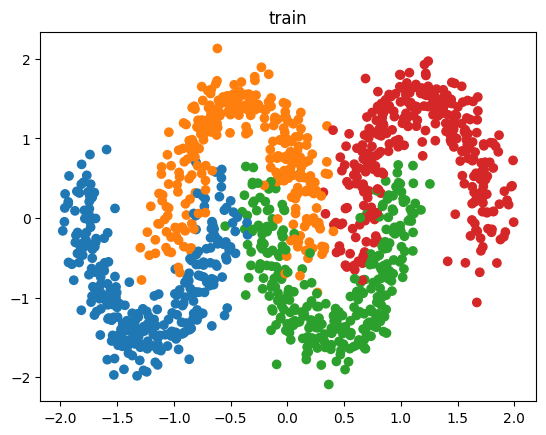

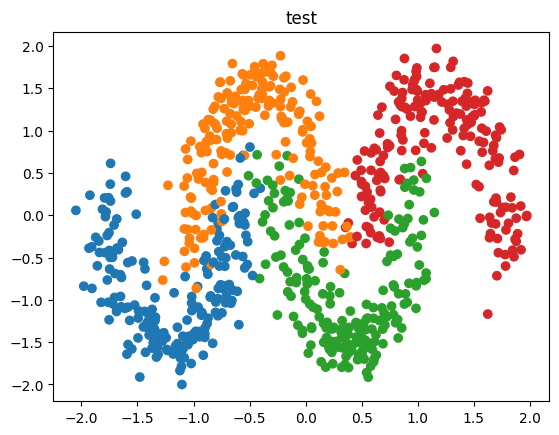

In [3]:
# ds = make_circles(n_samples=1000, noise=0.2, random_state=1, factor=0.5)
# ds = make_circles(n_samples=10000, noise=0.2, random_state=1, factor=0.5)

# ds = make_circles(n_samples=1000, noise=0.2, random_state=1, factor=0.5)
# ds = make_moons(n_samples=1000, noise=0.3, random_state=2)
ds = make_fourmoons(n_samples=500, noise=0.2, random_state=2)

X, y = ds
num_classes = np.amax(y) + 1



# dataframe = pd.read_csv("./data/diabetes.csv")
# # dataframe.info(verbose=True) # uncomment to check the info
# # discard entries with missing values (0 for the following columns are )
# columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# for col in columns:
#     dataframe[col].replace(0, np.NaN, inplace=True)  # dataframe[col] is Series corresponding to col
# dataframe.dropna(inplace=True) # rows with any NA will be dropped
# dataarr = dataframe.to_numpy(copy=True) # convert to np array
# X = dataarr[:,0:8]
# y = dataarr[:, 8].astype(int)

# num_classes = np.max(y) + 1



# split into test and train sets
x_train, x_test, y_train_ind, y_test_ind = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# standardize x_train, x_test
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_ind, num_classes)  # dtype float32
y_test = keras.utils.to_categorical(y_test_ind, num_classes)

# y_train = np.int64(y_train)
# y_test = np.int64(y_test)
print(num_classes)

SLMtrain = x_train
SLMtest = x_test
SLMytrain = y_train_ind
SLMytest = y_test_ind

print("train")
print(SLMtrain.shape)
print(SLMytrain.shape)


print("test")
print(SLMtest.shape)
print(SLMytest.shape)

# train
plt.scatter(x_train[:, 0], x_train[:, 1], c=["C{}".format(i) for i in y_train_ind])
plt.title("train")
plt.show()

# test
plt.scatter(x_test[:, 0], x_test[:, 1], c=["C{}".format(i) for i in y_test_ind])
plt.title("test")
plt.show()

In [30]:
print(y_test_ind[:3])

print(SLMytrain[:3])

print(SLMytest[:3])

[1 0 0]
[1 3 2]
[1 0 0]


In [4]:
# Training settings
parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
parser.add_argument('--batch-size', type=int, default=512, metavar='N',
                    help='input batch size for training (default: 64)')
parser.add_argument('--input-dim', type=int, default=28*28, metavar='N',
                    help='input dimension size(default: 28 * 28)')
parser.add_argument('--output-dim', type=int, default=10, metavar='N',
                    help='output dimension size(default: 10)')
parser.add_argument('--max-depth', type=int, default=5, metavar='N',
                    help='maximum depth of tree(default: 8)')
parser.add_argument('--epochs', type=int, default=50, metavar='N',
                    help='number of epochs to train (default: 40)')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                    help='learning rate (default: 0.01)')
parser.add_argument('--lmbda', type=float, default=0.1, metavar='LR',
                    help='temperature rate (default: 0.1)')
parser.add_argument('--momentum', type=float, default=0.8, metavar='M',
                    help='SGD momentum (default: 0.5)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='how many batches to wait before logging training status')
parser.add_argument('--hidden-size', type=int, default=10, metavar='N',
                    help='hhidden layer for MLP')
parser.add_argument('--linear', type=bool, default=False, metavar='N',
                    help='using linear or Relu for MLP')
# print(parser)
args = parser.parse_args("")

args.cuda = not args.no_cuda and torch.cuda.is_available()



# Make train loader for DIY dataset

In [5]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = torch.tensor(x_train, dtype=torch.float32)
        self.y_train = torch.tensor(y_train, dtype=torch.int64)

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]
    



# create dataset
dataset_train = MyDataset(SLMtrain, SLMytrain)
dataset_test = MyDataset(SLMtest, SLMytest)

# create data loaders
# batch_size = 128



In [6]:
args.batch_size = 120
args.input_dim = SLMtrain.shape[1]
args.output_dim = num_classes
args.epochs = 200
args.lr = 0.2
args.max_depth = 5
args.hidden_size = 16
# args.linear = True
print(args)

train_loader = DataLoader(dataset_train, batch_size=args.batch_size, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=args.batch_size, shuffle=False)


Namespace(batch_size=120, input_dim=2, output_dim=4, max_depth=5, epochs=200, lr=0.2, lmbda=0.1, momentum=0.8, no_cuda=False, seed=1, log_interval=10, hidden_size=16, linear=False, cuda=True)


In [7]:
model = SoftDecisionTree(args)
if args.cuda:
    model.cuda()

print(model)
for epoch in range(1, args.epochs + 1):
    
    model.train_(train_loader, epoch)
    model.test_(test_loader, epoch)

SoftDecisionTree(
  (module_list): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (1): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (2): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (3): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (4): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (5): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(

/home/hongyu/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/media/hongyu/SSD/SSDUBUNTU/WUSL/soft-decision-tree/model.py:103: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return(self.softmax(self.param.view(1,-1)))


Train Epoch: 1 [0/1200 (0%)]	Loss: 1.781778, Accuracy: 13/120 (10.8333%)

Test set: Accuracy: 356/800 (44.5000%)

directory ./result already exists
Train Epoch: 2 [0/1200 (0%)]	Loss: 1.653127, Accuracy: 56/120 (46.6667%)

Test set: Accuracy: 380/800 (47.5000%)

directory ./result already exists
Train Epoch: 3 [0/1200 (0%)]	Loss: 1.557535, Accuracy: 57/120 (47.5000%)

Test set: Accuracy: 389/800 (48.6250%)

directory ./result already exists
Train Epoch: 4 [0/1200 (0%)]	Loss: 1.504541, Accuracy: 50/120 (41.6667%)

Test set: Accuracy: 526/800 (65.7500%)

directory ./result already exists
Train Epoch: 5 [0/1200 (0%)]	Loss: 1.386317, Accuracy: 87/120 (72.5000%)

Test set: Accuracy: 544/800 (68.0000%)

directory ./result already exists
Train Epoch: 6 [0/1200 (0%)]	Loss: 1.280802, Accuracy: 84/120 (70.0000%)

Test set: Accuracy: 639/800 (79.8750%)

directory ./result already exists
Train Epoch: 7 [0/1200 (0%)]	Loss: 1.127405, Accuracy: 95/120 (79.1667%)

Test set: Accuracy: 680/800 (85.0000%)

In [8]:
with open(os.path.join('./result', 'best_model.pkl'), 'rb') as model_file:
    
    model = pickle.load( model_file)

print(model)

# print(model.parameters)

# print(model.param_list)

SoftDecisionTree(
  (module_list): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (1): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (2): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (3): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (4): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=1, bias=True)
    )
    (5): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(

In [9]:
# inference

testloader = DataLoader(dataset_test, batch_size=len(SLMytest), shuffle=False)
y_pred, y_target = model.inference(testloader)

y_target = y_target[0].cpu()

# print(y_target[:3])
y_pred_label = []

for pred in y_pred[0]:
    
    pred = pred.cpu()
    pred = np.argmax(pred)
    pred = pred.tolist()
    # print(pred)
    y_pred_label.append(pred)
    
# print(y_pred_label[:5])


Test set: Accuracy: 769/800 (96.1250%)



In [31]:
print(y_pred[:5])


[tensor([[0.0987, 0.9013],
        [0.8593, 0.1407],
        [0.0987, 0.9013],
        ...,
        [0.8593, 0.1407],
        [0.0987, 0.9013],
        [0.8593, 0.1407]], device='cuda:0')]


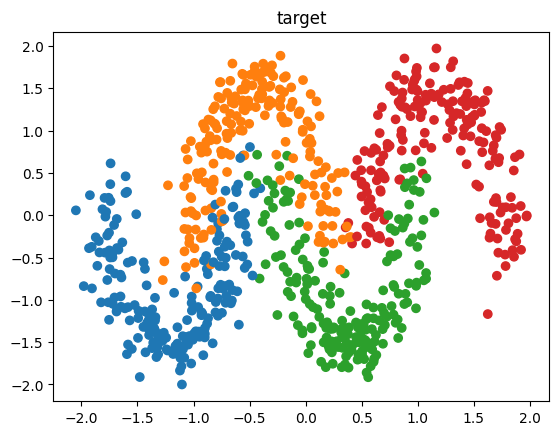

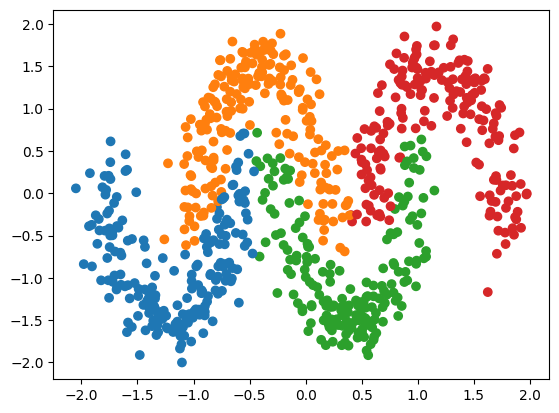

In [67]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=["C{}".format(i) for i in y_target])
plt.title("target")
plt.show()

plt.scatter(x_test[:, 0], x_test[:, 1], c=["C{}".format(i) for i in y_pred_label])
# plt.title("test")
plt.show()

# Test Random Forest

In [81]:
RF = []
args.epochs = 200
args.lr = 0.2
for modelidx in range(5):
    
    model = SoftDecisionTree(args)
    model.cuda()

    for epoch in range(1, args.epochs + 1):

        model.train_(train_loader, epoch)
        model.test_(test_loader, epoch)
        
    with open(os.path.join('./result', 'best_model.pkl'), 'rb') as model_file:
    
        model = pickle.load( model_file)
        
    RF.append(model)

Train Epoch: 1 [0/1200 (0%)]	Loss: 1.871103, Accuracy: 38/120 (31.6667%)

Test set: Accuracy: 247/800 (30.8750%)

directory ./result already exists
Train Epoch: 2 [0/1200 (0%)]	Loss: 1.776989, Accuracy: 34/120 (28.3333%)

Test set: Accuracy: 276/800 (34.5000%)

directory ./result already exists
Train Epoch: 3 [0/1200 (0%)]	Loss: 1.654248, Accuracy: 38/120 (31.6667%)

Test set: Accuracy: 531/800 (66.3750%)

directory ./result already exists
Train Epoch: 4 [0/1200 (0%)]	Loss: 1.473957, Accuracy: 78/120 (65.0000%)

Test set: Accuracy: 623/800 (77.8750%)

directory ./result already exists
Train Epoch: 5 [0/1200 (0%)]	Loss: 1.372279, Accuracy: 96/120 (80.0000%)

Test set: Accuracy: 653/800 (81.6250%)

directory ./result already exists
Train Epoch: 6 [0/1200 (0%)]	Loss: 1.204550, Accuracy: 99/120 (82.5000%)

Test set: Accuracy: 671/800 (83.8750%)

directory ./result already exists
Train Epoch: 7 [0/1200 (0%)]	Loss: 1.079029, Accuracy: 100/120 (83.3333%)

Test set: Accuracy: 666/800 (83.2500%

In [82]:
print(len(RF))

5


In [83]:
preds = []
testloader = DataLoader(dataset_test, batch_size=len(SLMytest), shuffle=False)

for model in RF:
    
    
    y_pred, _= model.inference(testloader)
    y_pred_label = []
    for pred in y_pred[0]:

        pred = pred.cpu()
        pred = np.argmax(pred)
        pred = pred.tolist()
        y_pred_label.append(pred)
    
    preds.append(y_pred_label)

    
preds = np.array(preds)
preds = preds.reshape((preds.shape[1], preds.shape[0]))


Test set: Accuracy: 746/800 (93.2500%)


Test set: Accuracy: 772/800 (96.5000%)


Test set: Accuracy: 758/800 (94.7500%)


Test set: Accuracy: 723/800 (90.3750%)


Test set: Accuracy: 741/800 (92.6250%)



(800, 5)
[0, 0, 0, 2, 1]


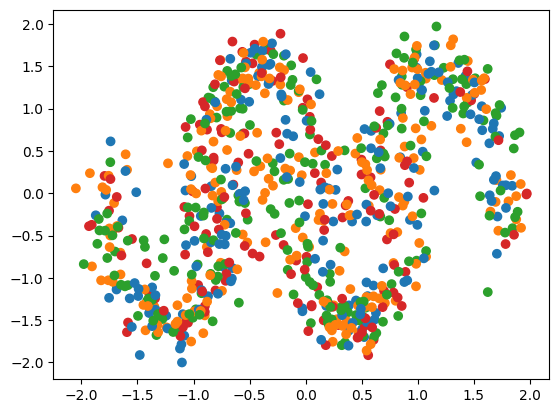

0.2375


In [97]:

print(preds.shape)

pred_ensemble = []
for predidx in range(SLMytest.shape[0]):
# for predidx in range(3):
    
    # print(preds[predidx])
    # counts = np.bincount(preds[predidx])
    counts = Counter(preds[predidx])
    # print(counts)
    # print(np.argmax(counts), SLMytest[predidx])
    # pred_ensemble.append(counts.most_common(1)[0][0])

print(pred_ensemble[:5])
    
# plt.scatter(x_test[:, 0], x_test[:, 1], c=["C{}".format(i) for i in pred_ensemble])
# # plt.title("test")
# plt.show()

# testacc = accuracy_score(pred_ensemble, SLMytest)
# print(testacc)